In [1]:
import pandas as pd
#file_name = "negatives_lightcurves_grouped_r_clean.parquet"
df = pd.read_csv("lightcurve_features_26_negative.parquet")

In [2]:
print(df.shape)

(1471, 27)


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load your negative sample
df_neg = pd.read_csv("lightcurve_features_26_negative.parquet")





In [4]:
features = df_neg.select_dtypes(include=[np.number])


In [5]:
features = features.replace([np.inf, -np.inf], np.nan)
features = features.dropna()


In [7]:
print(features.shape)
print(features.columns)


(1471, 26)
Index(['mean', 'weighted_mean', 'standard_deviation', 'median', 'amplitude',
       'beyond_1_std', 'cusum', 'inter_percentile_range_10', 'kurtosis',
       'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [8]:
features = df_neg.select_dtypes(include=[np.number])
X = StandardScaler().fit_transform(features)


In [9]:
# 3️⃣ Cluster with DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
df_neg["cluster"] = db.labels_

In [10]:
# Check number of clusters (excluding noise = -1)
clusters = [c for c in np.unique(db.labels_) if c != -1]
print(f"Found {len(clusters)} clusters: {clusters}")


Found 0 clusters: []


In [11]:
labels = db.labels_
print("Unique labels:", np.unique(labels))
print("Noise points:", np.sum(labels == -1))
print("Non-noise points:", np.sum(labels != -1))


Unique labels: [-1]
Noise points: 1471
Non-noise points: 0


In [12]:
from sklearn.cluster import DBSCAN

for eps in [0.3, 0.5, 1.0, 1.5, 2.0]:
    db = DBSCAN(eps=eps, min_samples=5).fit(X)
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    print(f"eps={eps}: clusters={n_clusters}, noise={np.sum(db.labels_ == -1)}")


eps=0.3: clusters=0, noise=1471
eps=0.5: clusters=0, noise=1471
eps=1.0: clusters=9, noise=1402
eps=1.5: clusters=2, noise=848
eps=2.0: clusters=3, noise=518


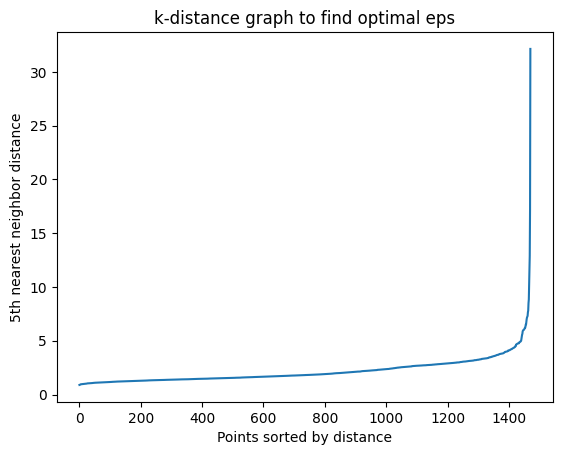

In [13]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances of the 5th nearest neighbor
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.ylabel("5th nearest neighbor distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance graph to find optimal eps")
plt.show()


Explained variance ratio: 0.6121079276520778


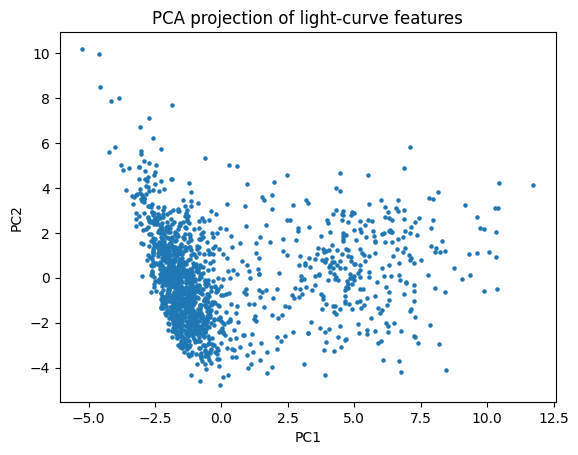

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_.sum())

plt.scatter(X_pca[:,0], X_pca[:,1], s=5)
plt.title("PCA projection of light-curve features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [15]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X_pca)
labels = db.labels_


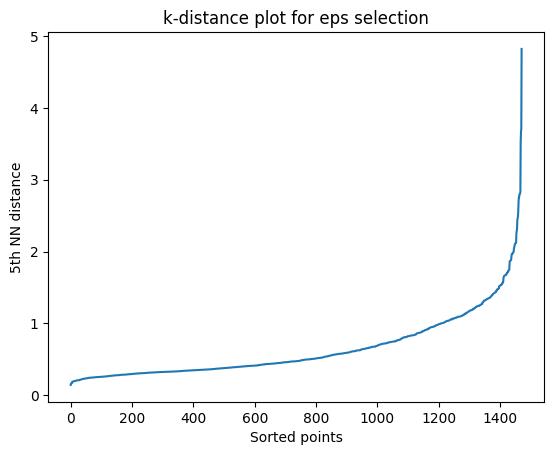

In [16]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distances = np.sort(distances[:, 4])  # 5th nearest neighbor
plt.plot(distances)
plt.ylabel("5th NN distance")
plt.xlabel("Sorted points")
plt.title("k-distance plot for eps selection")
plt.show()


In [68]:
db = DBSCAN(eps=2.36, min_samples=5).fit(X)


In [69]:
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Clusters:", n_clusters)
print("Noise points:", list(db.labels_).count(-1))


Clusters: 11
Noise points: 366


In [56]:
for m in [3, 4, 5, 6, 8, 10]:
    db = DBSCAN(eps=2.36, min_samples=m).fit(X)
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    noise = list(db.labels_).count(-1)
    print(f"min_samples={m}: clusters={n_clusters}, noise={noise}")


min_samples=3: clusters=17, noise=291
min_samples=4: clusters=13, noise=328
min_samples=5: clusters=11, noise=366
min_samples=6: clusters=6, noise=401
min_samples=8: clusters=2, noise=441
min_samples=10: clusters=1, noise=469


In [57]:
for eps in [2.2, 2.3, 2.36, 2.4, 2.5, 2.6]:
    db = DBSCAN(eps=eps, min_samples=5).fit(X)
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    noise = list(db.labels_).count(-1)
    print(f"eps={eps}: clusters={n_clusters}, noise={noise}")


eps=2.2: clusters=4, noise=438
eps=2.3: clusters=9, noise=389
eps=2.36: clusters=11, noise=366
eps=2.4: clusters=8, noise=348
eps=2.5: clusters=8, noise=308
eps=2.6: clusters=7, noise=259


In [73]:
db = DBSCAN(eps=2.36, min_samples=5).fit(X)
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Clusters:", n_clusters)
print("Noise points:", list(db.labels_).count(-1))


Clusters: 11
Noise points: 366


In [80]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load your data
df_neg = pd.read_csv("lightcurve_features_26_negative.parquet")  # ✅ Use correct file format

# Select only numeric columns (DBSCAN works on numeric data)
numeric_features = df_neg.select_dtypes(include=[np.number])

# Standardize numeric columns
X_scaled = StandardScaler().fit_transform(numeric_features)

# Apply DBSCAN clustering
db = DBSCAN(eps=2.36, min_samples=5)
clusters = db.fit_predict(X_scaled)

# Store cluster labels back in the DataFrame
df_neg["cluster"] = clusters

# View number of points per cluster
print(df_neg["cluster"].value_counts())


cluster
 1     1032
-1      366
 2       19
 8        8
 0        7
 3        7
 10       7
 6        6
 5        5
 4        5
 7        5
 9        4
Name: count, dtype: int64


In [81]:
df_neg['cluster'].value_counts()

cluster
 1     1032
-1      366
 2       19
 8        8
 0        7
 3        7
 10       7
 6        6
 5        5
 4        5
 7        5
 9        4
Name: count, dtype: int64

In [83]:
import pandas as pd
import numpy as np

# Filter out noise
clustered = df_neg[df_neg['cluster'] != -1]

# Number of clusters
clusters = clustered['cluster'].unique()
n_clusters = len(clusters)

# Target total negatives
target_total = 100
sample_per_cluster = target_total // n_clusters  # ~9 per cluster

# Sample equally from each cluster
sampled_list = []

for c in clusters:
    subset = clustered[clustered['cluster'] == c]
    if len(subset) >= sample_per_cluster:
        sampled = subset.sample(sample_per_cluster, random_state=42)
    else:
        # If a cluster is too small, take all its members
        sampled = subset
    sampled_list.append(sampled)

sampled_negatives = pd.concat(sampled_list)

# If total < 100, fill remaining from large clusters
remaining = target_total - len(sampled_negatives)
if remaining > 0:
    large_clusters = clustered.groupby('cluster').size().sort_values(ascending=False).index
    for c in large_clusters:
        if remaining <= 0:
            break
        subset = clustered[clustered['cluster'] == c]
        add = subset.sample(min(remaining, len(subset)), random_state=42)
        sampled_negatives = pd.concat([sampled_negatives, add])
        remaining -= len(add)

sampled_negatives = sampled_negatives.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle



In [84]:
# Save to Parquet
sampled_negatives.to_csv("sampled_negatives_100.parquet", index=False)


In [86]:
import pandas as pd
#file_name = "negatives_lightcurves_grouped_r_clean.parquet"
df = pd.read_csv("sampled_negatives_100.parquet")

In [88]:
df.head(100)

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster
0,ZTF18aayoezc,15.958988,15.949908,0.214299,15.867958,0.526211,0.210093,0.299659,0.641786,1.051781,...,204.475274,0.064102,0.464619,0.679163,0.013428,133.290478,95.682515,1.368328,0.749608,1
1,ZTF18aazmegd,16.951646,16.368075,1.055790,17.298720,2.498648,0.273326,0.253574,2.871053,-0.014166,...,294.399578,0.617620,0.391877,3.268099,0.062282,61.834156,2952.563872,-0.778567,0.851182,10
2,ZTF18aayozjc,19.666773,18.561190,0.944122,20.015309,1.975342,0.319867,0.198479,2.598570,-0.585859,...,1508.131797,0.492579,0.212452,2.480805,0.048006,48.269522,185.206875,-0.580094,0.910308,7
3,ZTF18aawacbv,16.606957,16.246418,1.008233,16.897438,1.808112,0.252193,0.310003,2.565669,-0.948408,...,384.115032,0.678130,0.109101,2.786119,0.060711,93.602123,2925.132627,-0.648338,0.892072,3
4,ZTF18abebexm,17.322432,16.854202,0.877888,17.386117,1.775292,0.341183,0.320126,2.105168,-1.472657,...,233.441237,0.782844,0.067908,1.855781,0.050679,90.388561,1208.223505,-0.220427,0.905596,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ZTF18aayooho,17.315035,17.295393,0.175163,17.252094,0.677206,0.147670,0.225725,0.426770,3.078080,...,240.205358,0.028015,0.761931,0.678516,0.010116,253.002465,40.799004,1.917408,0.668128,8
96,ZTF18abbkxxf,18.952058,18.347022,0.807000,18.730437,1.858974,0.375298,0.203046,2.247828,-0.602943,...,804.062949,0.380219,0.423628,2.184768,0.042581,58.603715,232.774433,0.292174,0.855443,7
97,ZTF18aayoeyn,14.924512,14.924749,0.200767,15.016751,0.687087,0.380656,0.342729,0.514084,-0.890614,...,599.968458,0.121478,0.363122,0.730005,0.013452,65.202857,95.454066,-0.333531,0.881971,1
98,ZTF18abjfrcj,16.196963,16.179376,0.242927,16.251177,0.481893,0.548267,0.390451,0.596260,-1.442164,...,860.370101,0.212440,0.108267,0.544119,0.014998,76.347861,177.461358,-0.053284,0.908329,1


In [92]:
import pandas as pd
import numpy as np

# df_neg must contain a column 'cluster' (from DBSCAN)
# Example:
# df_neg = pd.read_parquet("negatives_lightcurves_grouped_r_clean.parquet")

# remove noise points (-1) if you don’t want to include them
df_clusters = df_neg[df_neg['cluster'] != -1].copy()

subset_size = 100
num_subsets = 11

def make_subset(df, seed=0, subset_size=100):
    rng = np.random.default_rng(seed)
    clusters = df['cluster'].unique()
    n_clusters = len(clusters)
    per_cluster = subset_size // n_clusters
    
    samples = []
    for c in clusters:
        group = df[df['cluster'] == c]
        take = min(per_cluster, len(group))
        samples.append(group.sample(take, random_state=int(rng.integers(1e9))))
    
    subset = pd.concat(samples)
    # If we got less than subset_size, fill remaining randomly
    if len(subset) < subset_size:
        remaining = subset_size - len(subset)
        extra = df.sample(remaining, random_state=int(rng.integers(1e9)))
        subset = pd.concat([subset, extra])
        
    subset = subset.sample(frac=1, random_state=int(rng.integers(1e9))).reset_index(drop=True)
    return subset

# Generate and save 11 subsets
for i in range(num_subsets):
    subset = make_subset(df_clusters, seed=i, subset_size=subset_size)
    fname = f"negative_subset_{i+1}.parquet"
    subset.to_parquet(fname, index=False)
    print(f"Saved {fname} with {len(subset)} samples")


Saved negative_subset_1.parquet with 100 samples
Saved negative_subset_2.parquet with 100 samples
Saved negative_subset_3.parquet with 100 samples
Saved negative_subset_4.parquet with 100 samples
Saved negative_subset_5.parquet with 100 samples
Saved negative_subset_6.parquet with 100 samples
Saved negative_subset_7.parquet with 100 samples
Saved negative_subset_8.parquet with 100 samples
Saved negative_subset_9.parquet with 100 samples
Saved negative_subset_10.parquet with 100 samples
Saved negative_subset_11.parquet with 100 samples
